<a href="https://colab.research.google.com/github/DrWatt/Softcompexam/blob/master/NNGym.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
# pandas
import pandas as pd
# matplotlib
import matplotlib.pyplot as plt
# keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
# sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

Using TensorFlow backend.


In [0]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [3]:
# preparing data
!wget https://raw.githubusercontent.com/DrWatt/softcomp/master/datatree2.csv
dataset = pd.read_csv("datatree2.csv",header=0)
data = dataset.values
X = data[:15000,1:8]
BX = data[:15000,0]
encoder = LabelEncoder()
encoder.fit(BX)
encoded_BX = encoder.transform(BX)
transformed_BX = np_utils.to_categorical(encoded_BX)

--2019-08-23 14:22:51--  https://raw.githubusercontent.com/DrWatt/softcomp/master/datatree2.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6829398 (6.5M) [text/plain]
Saving to: ‘datatree2.csv’

datatree2.csv       100%[===================>]   6.51M  --.-KB/s    in 0.09s   

2019-08-23 14:22:51 (69.6 MB/s) - ‘datatree2.csv’ saved [6829398/6829398]



In [26]:
X

array([[    0,  1246,   -17,     2,     4,     1,     6],
       [    0,  -914,    -9,     2,     5,     2,     6],
       [    0, -1555,    -6,    -1,     1,     4,     2],
       [    1, -1556,    -6,    -1,     1,     4,     3],
       [   -1,   571,   -45,    -1,    12,     2,     3],
       [    0,   541,    37,    -1,    12,     1,     2],
       [    0,   565,     9,    -1,    12,     2,     2],
       [    0,   583,    12,    -1,    12,     3,     6],
       [    0,   589,     6,    -1,    12,     4,     2],
       [    0,  1220,   -14,    -2,     8,     1,     6],
       [    0,  -942,   -11,    -2,     9,     2,     6],
       [    0,   -43,   -20,    -2,    11,     1,     2],
       [   -1,   743,   -66,     0,     1,     3,     3],
       [    0,   710,    16,     0,     1,     1,     6],
       [    0,   726,    14,     0,     1,     2,     2],
       [    0,   741,     7,     0,     1,     3,     5],
       [    0,  -471,   -22,     0,     7,     1,     5],
       [    0,

In [27]:
BX

array([ 0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -3, -1,  2, -2,  0, -2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -2,  0,  0,  0, -1, -1, -2, -2, -2, -2,
       -2,  0,  0,  0,  0,  0,  0, -3,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -2,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  3,  0, -2, -2,  0,  3,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -2, -2,  0, -2,  0, -2,  0,  0,  0,  2,  2,
        2,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0,  2,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        3,  0,  0,  0,  0,  0,  3,  0,  0,  0,  0,  0, -2,  0, -2,  0, -2,
       -2,  0,  0,  0,  0,  0,  3,  0,  0,  3,  0,  0,  0,  0,  3,  0,  0,
        0,  0, -3, -3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -2,
       -2, -2, -3, -3,  0

In [4]:
len(X)

15000

In [5]:
# create model
def baseline_model():
  model = Sequential()
  model.add(Dense(8, input_dim=7, activation='relu'))
  model.add(Dense(7, activation='softmax'))
  # Compile model
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
 
  return model
model = baseline_model()

W0823 14:23:01.649374 139968547075968 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0823 14:23:01.703677 139968547075968 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0823 14:23:01.713490 139968547075968 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0823 14:23:01.751740 139968547075968 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0823 14:23:01.785046 139968547075968 deprecation_wrappe

In [6]:
# Compile model
estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=10, verbose=2)
estimator

In [43]:
kf=KFold(n_splits=10, shuffle=True, random_state=seed)
kf

KFold(n_splits=10, random_state=7, shuffle=True)

In [48]:
results= cross_val_score(estimator,X,transformed_BX,cv=kf,verbose=2,n_jobs=5)

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:  6.9min remaining: 27.7min


KeyboardInterrupt: ignored

In [0]:
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 87.57% (1.18%)


In [7]:
history = estimator.fit(X, transformed_BX, epochs=300, batch_size=10,verbose=2)

W0823 14:23:09.664417 139968547075968 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0823 14:23:09.718878 139968547075968 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/300
 - 2s - loss: 7.2165 - acc: 0.5339
Epoch 2/300
 - 1s - loss: 2.8333 - acc: 0.7829
Epoch 3/300
 - 1s - loss: 2.1680 - acc: 0.7851
Epoch 4/300
 - 1s - loss: 1.8224 - acc: 0.7933
Epoch 5/300
 - 1s - loss: 1.7797 - acc: 0.7927
Epoch 6/300
 - 1s - loss: 1.6681 - acc: 0.7949
Epoch 7/300
 - 1s - loss: 1.4079 - acc: 0.7957
Epoch 8/300
 - 1s - loss: 1.3990 - acc: 0.7977
Epoch 9/300
 - 1s - loss: 1.3710 - acc: 0.7953
Epoch 10/300
 - 1s - loss: 1.3694 - acc: 0.7977
Epoch 11/300
 - 1s - loss: 1.3272 - acc: 0.7984
Epoch 12/300
 - 1s - loss: 1.3507 - acc: 0.7985
Epoch 13/300
 - 1s - loss: 1.2815 - acc: 0.8081
Epoch 14/300
 - 1s - loss: 1.2616 - acc: 0.8135
Epoch 15/300
 - 1s - loss: 1.2448 - acc: 0.8152
Epoch 16/300
 - 1s - loss: 1.1673 - acc: 0.8142
Epoch 17/300
 - 1s - loss: 1.0971 - acc: 0.8147
Epoch 18/300
 - 2s - loss: 1.0669 - acc: 0.8160
Epoch 19/300
 - 1s - loss: 0.8952 - acc: 0.8259
Epoch 20/300
 - 1s - loss: 0.8954 - acc: 0.8287
Epoch 21/300
 - 1s - loss: 0.8745 - acc: 0.8301
E

In [8]:
!wget https://raw.githubusercontent.com/DrWatt/softcomp/master/datatree.csv
dataset2 = pd.read_csv("datatree.csv",header=0)
data2 = dataset2.values
X2 = data[100000:300000,1:8]
BX2 =  data[100000:300000,0]
prediction= estimator.predict(X2)


--2019-08-23 14:30:55--  https://raw.githubusercontent.com/DrWatt/softcomp/master/datatree.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 97530 (95K) [text/plain]
Saving to: ‘datatree.csv’

datatree.csv        100%[===================>]  95.24K  --.-KB/s    in 0.03s   

2019-08-23 14:30:55 (3.16 MB/s) - ‘datatree.csv’ saved [97530/97530]



In [9]:
pred=encoder.inverse_transform(prediction)
pred

array([0, 0, 0, ..., 0, 0, 0])

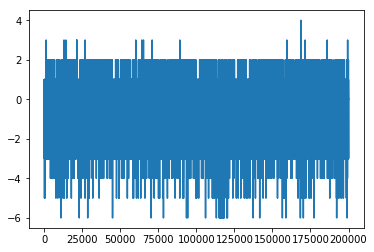

In [11]:
variable1=BX2-pred
plt.plot(range(len(BX2)),variable1)

In [12]:
o = open("BX2.csv","w")
for i in range(len(BX2)):
  o.write(str(BX2[i]))
  o.write("\n")
o.close()
BX2

array([0, 0, 0, ..., 0, 0, 0])

In [13]:
f = open("pred.csv","w")
for j in range(len(pred)):
 
  f.write(str(pred[j]))
  f.write("\n")
f.close()
pred[24]

0

In [14]:
from joblib import dump, load
dump(estimator,"asd.joblib")

['asd.joblib']